# **ActivitySim Tutorial**

This [ActivitySim](https://activitysim.github.io/) tutorial is a [Jupyter notebook](https://jupyter.org/) hosted in Google Colaboratory. It is an interactive Python 3 environment that describes how to set up, run, and analyze the results of ActivitySim modeling scenarios. It is assumed users of ActivitySim are familiar with the basic concepts of activity-based modeling.  This tutorial covers:

*   Installation and setup
*   Setting up and running a base model
*   Inputs and outputs
*   Setting up and running an alternative scenario
*   Comparing results
*   Next steps and further reading

This notebook is setup to run in the cloud using [Anaconda Python 3 64bit](https://www.anaconda.com/distribution/), but it can also be run locally.  To run it locally, download the ipynb file and run it with Jupyter using Anaconda Python 3 64bit. 




# Install ActivitySim

The first step is to install activitysim from [pypi](https://pypi.org/project/activitysim/) (the Python package index).  It also installs dependent packages such as [tables](https://pypi.org/project/tables/) for reading/writing HDF5, [openmatrix](https://pypi.org/project/OpenMatrix/) for reading/writing OMX matrix, and [pyyaml](https://pypi.org/project/PyYAML/) for yaml settings files.  

Run the code cell by clicking on the [ ] play button. 

In [1]:
!pip install https://github.com/RSGInc/activitysim/zipball/cli

  HTTP error 404 while getting https://github.com/RSGInc/activitysim/zipball/cli
  Could not install requirement https://github.com/RSGInc/activitysim/zipball/cli because of error 404 Client Error: Not Found for url: https://codeload.github.com/RSGInc/activitysim/legacy.zip/cli
Could not install requirement https://github.com/RSGInc/activitysim/zipball/cli because of HTTP error 404 Client Error: Not Found for url: https://codeload.github.com/RSGInc/activitysim/legacy.zip/cli for URL https://github.com/RSGInc/activitysim/zipball/cli


# Get the Example 

The example is included in the [GitHub project repository](https://github.com/activitysim/activitysim) and can be downloaded by cloning the repository.  The example includes all model steps.  The code below copies the example data out of the repository and into a new example folder for the tutorial.  It also changes into the new example folder so we can run the model from there.  

View the notebook folders and files via View + Table of Contents + Files.

In [0]:
!activitysim create -e example_mtc -d example
%cd example

copying files from example_mtc...
copied! new project files are in /content/example
/content/example


# Run the Example

The code below runs the example, which runs in a couple of minutes.  The example consists of 100 synthetic households and the first 25 zones in the example model region.  The full example files are available on MTC's [box account](https://mtcdrive.app.box.com/v/activitysim/folder/7484860689).  As the model runs, it logs information to the screen.  

To run the example, run the simulation.py script from the command line.  As shown in the script help, the default settings assume a configs, data, and output folder in the current directory.

**TODO - RUN A LARGER SAMPLE FOR THE SCENARIO TESTING?**

In [0]:
!activitysim run -c configs -d data -o output

Configured logging using basicConfig
INFO:activitysim:Configured logging using basicConfig
INFO:activitysim.cli.run:using configs_dir: ['configs']
INFO:activitysim.cli.run:using data_dir: ['data']
INFO:activitysim.cli.run:using output_dir: ['output']
INFO - Read logging configuration from: configs/logging.yaml
INFO - setting households_sample_size: 100
INFO - setting chunk_size: 0
INFO - setting multiprocess: None
INFO - setting num_processes: None
INFO - setting resume_after: None
INFO - run single process simulation
INFO - open_pipeline
INFO - Set random seed base to 0
INFO - Time to execute open_pipeline : 0.002 seconds (0.0 minutes)
INFO - preload_injectables
INFO - Time to execute preload_injectables : 0.0 seconds (0.0 minutes)
INFO - Reading CSV file data/land_use.csv
INFO - land_use table columns: ['ZONE' 'DISTRICT' 'SD' 'COUNTY' 'TOTHH' 'HHPOP' 'TOTPOP' 'EMPRES' 'SFDU'
 'MFDU' 'HHINCQ1' 'HHINCQ2' 'HHINCQ3' 'HHINCQ4' 'TOTACRE' 'RESACRE'
 'CIACRE' 'SHPOP62P' 'TOTEMP' 'AGE0004' 'A

# Run the Multiprocessor Example

The code below runs the example, which runs in a couple of minutes.  The example consists of 100 synthetic households and the first 25 zones in the example model region.  The full example files are available on MTC's [box account](https://mtcdrive.app.box.com/v/activitysim/folder/7484860689).  As the model runs, it logs information to the screen.  

To run the example, run the simulation.py script from the command line.  As shown in the script help, the default settings assume a configs, data, and output folder in the current directory.

**TODO - RUN A LARGER SAMPLE FOR THE SCENARIO TESTING?**

In [0]:
!activitysim run -c configs_mp -c configs -d data -o output

Configured logging using basicConfig
INFO:activitysim:Configured logging using basicConfig
INFO:activitysim.cli.run:using configs_dir: ['configs_mp', 'configs']
INFO:activitysim.cli.run:using data_dir: ['data']
INFO:activitysim.cli.run:using output_dir: ['output']
INFO - activitysim - Read logging configuration from: configs_mp/logging.yaml
DEBUG - activitysim.core.config - inherit_settings flag set for settings.yaml in configs_mp/settings.yaml
DEBUG - activitysim.core.config - read settings for settings.yaml from configs/settings.yaml
INFO - activitysim.cli.run - setting households_sample_size: 100
INFO - activitysim.cli.run - setting chunk_size: 0
INFO - activitysim.cli.run - setting multiprocess: True
INFO - activitysim.cli.run - setting num_processes: 2
INFO - activitysim.cli.run - setting resume_after: None
DEBUG - activitysim.core.tracing - delete_output_files ignoring output/activitysim.log
INFO - activitysim.cli.run - run multiprocess simulation
INFO - activitysim.core.mp_tasks

# Inputs and Outputs Overview

An ActivitySim model requires:

*  Configs: settings, model step expressions files, etc.​
  * settings.yaml - main settings file for running the model
  * [model].yaml - configuration file for the model step (such as auto ownership)
  * [model].csv - expressions file for the model step
*  Data: input data - input data tables and skims​
  * land_use.csv - zone data file
  * households.csv - synthethic households
  * persons.csv - synthethic persons
  * skims.omx - all skims in one open matrix file
*  Output: output data - output data, tables, tracing info, etc.
  * pipeline.h5 - data pipeline database file (all tables at each model step)
  * final_[table].csv - final household, person, tour, trip CSV tables
  * activitysim.log - console log file
  * trace.[model].csv - trace calculations for select households
*  simulation.py: main script to run the model

Browse the folder contents in the Files viewer and run the command below to list the example folder contents.

In [0]:
!ls -R

.:
configs  data  output  README.MD  simulation.py

./configs:
accessibility.csv
accessibility.yaml
annotate_households_cdap.csv
annotate_households.csv
annotate_households_workplace.csv
annotate_landuse.csv
annotate_persons_after_hh.csv
annotate_persons_cdap.csv
annotate_persons.csv
annotate_persons_jtp.csv
annotate_persons_mtf.csv
annotate_persons_nmtf.csv
annotate_persons_school.csv
annotate_persons_workplace.csv
atwork_subtour_destination.csv
atwork_subtour_destination_sample.csv
atwork_subtour_destination.yaml
atwork_subtour_frequency_alternatives.csv
atwork_subtour_frequency_annotate_tours_preprocessor.csv
atwork_subtour_frequency.csv
atwork_subtour_frequency.yaml
auto_ownership.csv
auto_ownership.yaml
cdap_fixed_relative_proportions.csv
cdap_indiv_and_hhsize1.csv
cdap_interaction_coefficients.csv
cdap.yaml
destination_choice_size_terms.csv
free_parking_annotate_persons_preprocessor.csv
free_parking.csv
free_parking.yaml
initialize_households.yaml
initialize_landuse.yaml
joint_to

# Inputs

Browse the folder contents in the Files viewer and run the commands below to: 
* Load required Python libraries for reading data
* Display the settings.yaml, including the list of *models* to run
* Display the land_use, households, and persons tables
* Display the skims

In [0]:
print("load libraries")
import pandas as pd
import openmatrix as omx

load libraries


In [0]:
print("display the settings file")
!cat configs/settings.yaml

display the settings file
#input data store and skims
input_store: mtc_asim.h5
skims_file: skims.omx

#number of households to simulate
households_sample_size:  100
# simulate all households
#households_sample_size: 0

chunk_size: 0

# set false to disable variability check in simple_simulate and interaction_simulate
check_for_variability: False

# - shadow pricing global switches

# turn shadow_pricing on and off for all models (e.g. school and work)
# shadow pricing is deprecated for less than full samples
# see shadow_pricing.yaml for additional settings
use_shadow_pricing: False


# - tracing

#trace household id; comment out or leave empty for no trace
# households with all tour types
#  [ 728370 1234067 1402924 1594625 1595333 1747572 1896849 1931818 2222690 2344951 2677154]
trace_hh_id: 701664

# trace origin, destination in accessibility calculation; comment out or leave empty for no trace
#trace_od: [5, 11]
trace_od:


models:
  - initialize_landuse
  - compute_accessibility
 

In [0]:
print("input land_use")
pd.read_hdf("data/mtc_asim.h5", "land_use_taz")

input land_use


,DISTRICT,SD,COUNTY,TOTHH,HHPOP,TOTPOP,EMPRES,SFDU,MFDU,HHINCQ1,HHINCQ2,HHINCQ3,HHINCQ4,TOTACRE,RESACRE,CIACRE,SHPOP62P,TOTEMP,AGE0004,AGE0519,AGE2044,AGE4564,AGE65P,RETEMPN,FPSEMPN,HEREMPN,OTHEMPN,AGREMPN,MWTEMPN,PRKCST,OPRKCST,area_type,HSENROLL,COLLFTE,COLLPTE,TOPOLOGY,TERMINAL,ZERO,hhlds,sftaz,gqpop
ZONE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,46,74,82,37,1,60,15,13,9,9,20.3,1.00000,15.00000,0.238,27318,3,7,31,27,14,224,21927,2137,2254,18,758,284.01965,932.83514,0,0.00000,0.00000,0.00000,3,5.89564,0,46,1,8
2,1,1,1,134,214,240,107,5,147,57,32,24,21,31.1,1.00000,24.79297,0.238,42078,8,19,89,81,43,453,33422,4399,2948,56,800,269.64310,885.61682,0,0.00000,0.00000,0.00000,1,5.84871,0,134,2,26
3,1,1,1,267,427,476,214,9,285,101,86,40,40,14.7,1.00000,2.31799,0.238,2445,16,38,177,160,85,93,1159,950,211,0,32,218.08298,716.27252,0,0.00000,0.00000,0.00000,1,5.53231,0,267,3,49
4,1,1,1,151,239,253,117,6,210,52,47,30,22,19.3,1.00000,18.00000,0.238,22434,8,20,95,85,45,403,15430,3200,1907,116,1378,191.00000,314.00000,0,0.00000,0.00000,0.00000,2,5.64330,0,151,4,14
5,1,1,1,611,974,1069,476,22,671,223,180,104,104,52.7,1.00000,15.00000,0.238,15662,37,86,396,359,191,2175,6356,5443,1292,5,391,191.00870,314.01431,0,0.00000,72.14684,0.00000,1,5.52555,0,611,5,95
6,1,1,1,2240,3311,3963,2052,0,2406,843,699,399,299,29.0,7.00000,8.00000,0.142,3789,77,226,2311,944,405,151,924,1997,672,1,44,150.00000,546.00000,0,0.00000,0.00000,0.00000,1,5.00004,0,2240,6,652
7,1,1,1,3762,5561,6032,3375,0,4174,1489,1036,647,590,45.0,13.00000,14.00000,0.191,11300,173,425,2689,1909,836,252,5535,4593,799,1,120,318.85754,933.24158,0,0.00000,0.00000,0.00000,1,5.35435,0,3762,7,471
8,1,1,1,4582,7565,9907,3594,19,4898,2704,864,529,485,51.0,8.33042,15.00000,0.250,4171,390,876,3159,3621,1861,344,1413,1690,648,7,69,138.67470,529.59387,0,0.00000,0.00000,0.00000,2,4.64648,0,4582,8,2342
9,1,1,1,5545,9494,10171,4672,35,6032,2605,1318,846,776,112.0,9.79332,47.00000,0.163,31248,416,1034,4851,2661,1209,123,8750,9500,12434,4,437,181.05391,299.21539,0,26.92893,2035.58118,20.60887,2,5.22542,0,5545,9,677


In [0]:
print("input households")
pd.read_hdf("data/mtc_asim.h5", "households")

input households


,TAZ,SERIALNO,PUMA5,income,PERSONS,HHT,UNITTYPE,NOC,BLDGSZ,TENURE,VEHICL,hinccat1,hinccat2,hhagecat,hsizecat,hfamily,hunittype,hNOCcat,hwrkrcat,h0004,h0511,h1215,h1617,h1824,h2534,h3549,h5064,h6579,h80up,workers,hwork_f,hwork_p,huniv,hnwork,hretire,hpresch,hschpred,hschdriv,htypdwel,hownrent,hadnwst,hadwpst,hadkids,bucketBin,originalPUMA,hmultiunit
HHID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2717868,25,2715386,2202,361000,2,1,0,0,9,1,1,4,9,2,2,2,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,2,1,0,0,0,3,2202,1
763899,6,5360279,2203,59220,1,4,0,0,9,3,1,3,6,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2,2,0,0,0,4,2203,1
2222791,9,77132,2203,197000,2,2,0,0,9,1,2,4,9,1,2,2,0,0,2,0,0,0,0,1,0,1,0,0,0,2,1,1,0,0,0,0,0,0,2,1,0,0,1,5,2203,1
112477,17,3286812,2203,2200,1,6,0,0,8,3,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2,2,0,0,0,7,2203,1
370491,21,6887183,2203,16500,3,1,0,1,8,3,0,1,2,1,3,2,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,2,2,0,0,0,7,2203,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109218,10,3592966,2203,15000,1,4,0,0,8,3,0,1,2,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2,2,0,0,0,7,2203,1
570708,23,2418140,2202,13100,1,6,0,0,9,3,0,1,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,2,0,0,0,6,2202,1
2762199,21,4016973,2203,0,1,0,2,0,0,0,0,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2,2,0,0,0,2,2203,1


In [0]:
print("input persons")
pd.read_hdf("data/mtc_asim.h5", "persons")

input persons


,household_id,age,RELATE,ESR,GRADE,PNUM,PAUG,DDP,sex,WEEKS,HOURS,MSP,POVERTY,EARNS,pagecat,pemploy,pstudent,ptype,padkid
PERID,,,,,,,,,,,,,,,,,,,
25671,25671,47,1,6,0,1,0,0,1,0,0,6,39,0,6,3,3,4,2
25675,25675,27,1,6,7,1,0,0,2,52,40,2,84,7200,5,3,2,3,2
25678,25678,30,1,6,0,1,0,0,2,0,0,6,84,0,5,3,3,4,2
25683,25683,23,1,6,0,1,0,0,1,0,0,6,1,0,4,3,3,4,2
25684,25684,52,1,6,0,1,0,0,1,0,0,6,94,0,7,3,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7554848,2863513,68,22,6,0,1,0,0,1,0,0,4,0,0,8,3,3,5,2
7554855,2863520,68,22,6,0,1,0,0,1,0,0,4,0,0,8,3,3,5,2
7554859,2863524,93,22,6,0,1,0,0,2,0,0,2,0,0,9,3,3,5,2


In [0]:
print("all skims for 25 zones")
print(omx.open_file("data/skims.omx"))

all skims for 25 zones
data/skims.omx (File) ''
Last modif.: 'Sat Jan  4 19:36:21 2020'
Object Tree: 
/ (RootGroup) ''
/data (Group) ''
/data/DIST (CArray(25, 25), shuffle, zlib(1)) ''
/data/DISTBIKE (CArray(25, 25), shuffle, zlib(1)) ''
/data/DISTWALK (CArray(25, 25), shuffle, zlib(1)) ''
/data/DRV_COM_WLK_BOARDS__AM (CArray(25, 25), shuffle, zlib(1)) ''
/data/DRV_COM_WLK_BOARDS__EA (CArray(25, 25), shuffle, zlib(1)) ''
/data/DRV_COM_WLK_BOARDS__EV (CArray(25, 25), shuffle, zlib(1)) ''
/data/DRV_COM_WLK_BOARDS__MD (CArray(25, 25), shuffle, zlib(1)) ''
/data/DRV_COM_WLK_BOARDS__PM (CArray(25, 25), shuffle, zlib(1)) ''
/data/DRV_COM_WLK_DDIST__AM (CArray(25, 25), shuffle, zlib(1)) ''
/data/DRV_COM_WLK_DDIST__EA (CArray(25, 25), shuffle, zlib(1)) ''
/data/DRV_COM_WLK_DDIST__EV (CArray(25, 25), shuffle, zlib(1)) ''
/data/DRV_COM_WLK_DDIST__MD (CArray(25, 25), shuffle, zlib(1)) ''
/data/DRV_COM_WLK_DDIST__PM (CArray(25, 25), shuffle, zlib(1)) ''
/data/DRV_COM_WLK_DTIM__AM (CArray(25, 25), 

# Outputs

Browse the folder contents in the Files viewer and run the commands below to: 
* Display the contents of the output data pipeline 
* Gets the households table after  auto ownership is run
* Display the output household and person tables
* Display the output tour and trip tables

In [0]:
print("output pipeline with the state of each table after each model step")
pipeline = pd.io.pytables.HDFStore('output/pipeline.h5')
pipeline.keys()

output pipeline with the state of each table after each model step


['/checkpoints',
 '/workplace_modeled_size/workplace_location',
 '/workplace_destination_size/initialize_households',
 '/trips/stop_frequency',
 '/trips/trip_destination',
 '/trips/trip_mode_choice',
 '/trips/trip_purpose',
 '/trips/trip_purpose_and_destination',
 '/trips/trip_scheduling',
 '/tours/atwork_subtour_destination',
 '/tours/atwork_subtour_frequency',
 '/tours/atwork_subtour_mode_choice',
 '/tours/atwork_subtour_scheduling',
 '/tours/joint_tour_composition',
 '/tours/joint_tour_destination',
 '/tours/joint_tour_frequency',
 '/tours/joint_tour_participation',
 '/tours/joint_tour_scheduling',
 '/tours/mandatory_tour_frequency',
 '/tours/mandatory_tour_scheduling',
 '/tours/non_mandatory_tour_destination',
 '/tours/non_mandatory_tour_frequency',
 '/tours/non_mandatory_tour_scheduling',
 '/tours/stop_frequency',
 '/tours/tour_mode_choice_simulate',
 '/school_modeled_size/school_location',
 '/school_destination_size/initialize_households',
 '/persons/cdap_simulate',
 '/persons/fr

In [0]:
print("households table after auto ownership: new fields auto_ownership and hh_work_auto_savings_ratio")
pipeline['/households/auto_ownership_simulate']

households table after auto ownership: new fields auto_ownership and hh_work_auto_savings_ratio


,TAZ,SERIALNO,PUMA5,income,hhsize,HHT,UNITTYPE,NOC,BLDGSZ,TENURE,VEHICL,hinccat1,hinccat2,hhagecat,hsizecat,hfamily,hunittype,hNOCcat,hwrkrcat,h0004,h0511,h1215,h1617,h1824,h2534,h3549,h5064,h6579,h80up,num_workers,hwork_f,hwork_p,huniv,hnwork,hretire,hpresch,hschpred,hschdriv,htypdwel,hownrent,hadnwst,hadwpst,hadkids,bucketBin,originalPUMA,hmultiunit,chunk_id,income_in_thousands,income_segment,median_value_of_time,hh_value_of_time,num_non_workers,num_drivers,num_adults,num_children,num_young_children,num_children_5_to_15,num_children_16_to_17,num_college_age,num_young_adults,non_family,family,home_is_urban,home_is_rural,auto_ownership,hh_work_auto_savings_ratio
household_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
982875,16,286778,2203,30900,2,5,0,0,8,3,0,2,4,1,2,1,0,0,2,0,0,0,0,0,2,0,0,0,0,2,1,0,1,0,0,0,0,0,2,2,0,1,0,9,2203,1,0,30.90,2,8.81,6.021274,0,2,2,0,0,0,0,0,2,True,False,True,False,1,0.212500
1810015,16,9947661,2203,99700,9,2,0,0,5,3,1,3,8,1,5,2,0,0,3,1,0,0,0,3,3,1,1,0,0,4,2,1,1,3,0,1,0,1,2,2,1,1,3,7,2203,1,1,99.70,3,10.44,3.705326,5,8,8,1,1,0,0,3,3,False,True,True,False,1,0.684130
1099626,20,2041285,2203,58160,3,1,0,1,5,3,2,3,6,1,3,2,0,1,1,1,0,0,0,0,0,2,0,0,0,1,1,0,1,0,0,1,0,0,2,2,1,0,0,7,2203,1,2,58.16,2,8.81,10.708809,2,2,2,1,1,0,0,0,0,False,True,True,False,1,0.192910
763879,6,5360279,2203,59220,1,4,0,0,9,3,1,3,6,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2,2,0,0,0,4,2203,1,3,59.22,2,8.81,10.449020,1,1,1,0,0,0,0,0,0,True,False,True,False,1,0.000000
824207,18,4646524,2203,51000,1,4,0,0,8,3,1,3,6,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,2,2,0,0,0,3,2203,1,4,51.00,2,8.81,17.135346,0,1,1,0,0,0,0,0,1,True,False,True,False,0,0.187061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287819,9,4170325,2201,6500,2,3,0,1,8,3,0,1,1,1,2,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,2,2,1,0,0,2,2201,1,95,6.50,1,6.01,1.296461,2,1,1,1,0,1,0,0,0,False,True,True,False,1,0.000000
2832313,10,1825442,2203,0,1,0,2,0,0,0,0,1,1,2,1,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,2,0,0,0,9,2203,1,96,0.00,1,6.01,40.346540,1,1,1,0,0,0,0,0,0,False,False,True,False,0,0.000000
2222549,7,3542857,2203,112500,2,5,0,0,7,2,0,4,9,1,2,1,0,0,2,0,0,0,0,2,0,0,0,0,0,2,1,0,1,0,0,0,0,0,2,1,0,2,0,2,2203,1,97,112.50,4,12.86,1.170546,0,2,2,0,0,0,0,2,0,True,False,True,False,0,0.200670


In [0]:
print("output households")
pd.read_csv("output/final_households.csv")

output households


,household_id,TAZ,SERIALNO,PUMA5,income,hhsize,HHT,UNITTYPE,NOC,BLDGSZ,TENURE,VEHICL,hinccat1,hinccat2,hhagecat,hsizecat,hfamily,hunittype,hNOCcat,hwrkrcat,h0004,h0511,h1215,h1617,h1824,h2534,h3549,h5064,h6579,h80up,num_workers,hwork_f,hwork_p,huniv,hnwork,hretire,hpresch,hschpred,hschdriv,htypdwel,hownrent,hadnwst,hadwpst,hadkids,bucketBin,originalPUMA,hmultiunit,chunk_id,income_in_thousands,income_segment,median_value_of_time,hh_value_of_time,num_non_workers,num_drivers,num_adults,num_children,num_young_children,num_children_5_to_15,num_children_16_to_17,num_college_age,num_young_adults,non_family,family,home_is_urban,home_is_rural,auto_ownership,hh_work_auto_savings_ratio,num_under16_not_at_school,num_travel_active,num_travel_active_adults,num_travel_active_preschoolers,num_travel_active_children,num_travel_active_non_preschoolers,participates_in_jtf_model,joint_tour_frequency,num_hh_joint_tours
0,982875,16,286778,2203,30900,2,5,0,0,8,3,0,2,4,1,2,1,0,0,2,0,0,0,0,0,2,0,0,0,0,2,1,0,1,0,0,0,0,0,2,2,0,1,0,9,2203,1,0,30.90,2,8.81,6.021274,0,2,2,0,0,0,0,0,2,True,False,True,False,1,0.212500,0,2,2,0,0,2,True,0_tours,0
1,1810015,16,9947661,2203,99700,9,2,0,0,5,3,1,3,8,1,5,2,0,0,3,1,0,0,0,3,3,1,1,0,0,4,2,1,1,3,0,1,0,1,2,2,1,1,3,7,2203,1,1,99.70,3,10.44,3.705326,5,8,8,1,1,0,0,3,3,False,True,True,False,1,0.684130,0,7,6,1,1,6,True,0_tours,0
2,1099626,20,2041285,2203,58160,3,1,0,1,5,3,2,3,6,1,3,2,0,1,1,1,0,0,0,0,0,2,0,0,0,1,1,0,1,0,0,1,0,0,2,2,1,0,0,7,2203,1,2,58.16,2,8.81,10.708809,2,2,2,1,1,0,0,0,0,False,True,True,False,1,0.192910,0,3,2,1,1,2,True,0_tours,0
3,763879,6,5360279,2203,59220,1,4,0,0,9,3,1,3,6,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2,2,0,0,0,4,2203,1,3,59.22,2,8.81,10.449020,1,1,1,0,0,0,0,0,0,True,False,True,False,1,0.000000,0,1,1,0,0,1,False,NaN,0
4,824207,18,4646524,2203,51000,1,4,0,0,8,3,1,3,6,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,2,2,0,0,0,3,2203,1,4,51.00,2,8.81,17.135346,0,1,1,0,0,0,0,0,1,True,False,True,False,0,0.187061,0,1,1,0,0,1,False,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,287819,9,4170325,2201,6500,2,3,0,1,8,3,0,1,1,1,2,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,2,2,1,0,0,2,2201,1,95,6.50,1,6.01,1.296461,2,1,1,1,0,1,0,0,0,False,True,True,False,1,0.000000,0,2,1,0,1,2,True,0_tours,0
96,2832313,10,1825442,2203,0,1,0,2,0,0,0,0,1,1,2,1,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,2,0,0,0,9,2203,1,96,0.00,1,6.01,40.346540,1,1,1,0,0,0,0,0,0,False,False,True,False,0,0.000000,0,1,1,0,0,1,False,NaN,0
97,2222549,7,3542857,2203,112500,2,5,0,0,7,2,0,4,9,1,2,1,0,0,2,0,0,0,0,2,0,0,0,0,0,2,1,0,1,0,0,0,0,0,2,1,0,2,0,2,2203,1,97,112.50,4,12.86,1.170546,0,2,2,0,0,0,0,2,0,True,False,True,False,0,0.200670,0,2,2,0,0,2,True,0_tours,0
98,2048809,11,6264043,2203,145450,1,4,0,0,5,3,1,4,9,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,2,2,0,0,0,4,2203,1,98,145.45,4,12.86,9.983388,0,1,1,0,0,0,0,0,0,True,False,True,False,1,0.138205,0,1,1,0,0,1,False,NaN,0


In [0]:
print("output persons")
pd.read_csv("output/final_persons.csv")

output persons


,person_id,household_id,age,RELATE,ESR,GRADE,PNUM,PAUG,DDP,sex,WEEKS,HOURS,MSP,POVERTY,EARNS,pagecat,pemploy,pstudent,ptype,padkid,age_16_to_19,age_16_p,adult,male,female,has_non_worker,has_retiree,has_preschool_kid,has_driving_kid,has_school_kid,has_full_time,has_part_time,has_university,student_is_employed,nonstudent_to_school,is_student,is_gradeschool,is_highschool,is_university,school_segment,is_worker,home_taz,value_of_time,school_taz,distance_to_school,roundtrip_auto_time_to_school,workplace_taz,distance_to_work,workplace_in_cbd,work_taz_area_type,roundtrip_auto_time_to_work,work_auto_savings,work_auto_savings_ratio,free_parking_at_work,cdap_activity,cdap_rank,travel_active,under16_not_at_school,has_preschool_kid_at_home,has_school_kid_at_home,mandatory_tour_frequency,work_and_school_and_worker,work_and_school_and_student,num_mand,num_work_tours,num_joint_tours,non_mandatory_tour_frequency,num_non_mand,num_escort_tours,num_eatout_tours,num_shop_tours,num_maint_tours,num_discr_tours,num_social_tours,num_non_escort_tours
0,26478,26478,46,1,6,0,1,0,0,1,0,0,6,53,0,6,3,3,4,2,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,8,1.000000,-1,NaN,0.00,-1,NaN,False,NaN,0.0,0.0,0.0,False,N,1,True,False,False,False,NaN,False,False,0,0,0,12,2,0,1,0,1,0,0,2
1,26686,26686,39,1,6,0,1,0,0,1,0,0,6,1,0,6,3,3,4,2,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,8,2.843104,-1,NaN,0.00,-1,NaN,False,NaN,0.0,0.0,0.0,False,N,1,True,False,False,False,NaN,False,False,0,0,0,12,2,0,1,0,1,0,0,2
2,26844,26844,51,1,3,0,1,0,0,1,0,0,6,41,0,7,3,3,4,2,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,8,41.958689,-1,NaN,0.00,-1,NaN,False,NaN,0.0,0.0,0.0,False,N,1,True,False,False,False,NaN,False,False,0,0,0,2,1,0,0,0,0,0,1,1
3,27726,27726,52,1,6,0,1,0,0,1,0,0,4,277,0,7,3,3,4,2,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,10,5.584662,-1,NaN,0.00,-1,NaN,False,NaN,0.0,0.0,0.0,False,N,1,True,False,False,False,NaN,False,False,0,0,0,1,1,0,0,0,0,1,0,1
4,27748,27748,57,1,6,0,1,0,0,2,0,0,4,106,0,7,3,3,4,2,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,10,3.010415,-1,NaN,0.00,-1,NaN,False,NaN,0.0,0.0,0.0,False,H,1,False,False,False,False,NaN,False,False,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,7523517,2832182,87,23,6,0,1,0,0,2,0,0,3,128,0,9,3,3,5,2,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,7,3.040201,-1,NaN,0.00,-1,NaN,False,NaN,0.0,0.0,0.0,False,N,1,True,False,False,False,NaN,False,False,0,0,0,1,1,0,0,0,0,1,0,1
163,7523648,2832313,78,23,6,0,1,0,0,2,0,0,4,57,0,8,3,3,5,2,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,10,40.346540,-1,NaN,0.00,-1,NaN,False,NaN,0.0,0.0,0.0,False,N,1,True,False,False,False,NaN,False,False,0,0,0,1,1,0,0,0,0,1,0,1
164,7523764,2832429,93,23,6,0,1,0,0,2,0,0,2,172,0,9,3,3,5,2,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,16,7.951881,-1,NaN,0.00,-1,NaN,False,NaN,0.0,0.0,0.0,False,H,1,False,False,False,False,NaN,False,False,0,0,0,0,0,0,0,0,0,0,0,0
165,7539466,2848131,38,22,6,5,1,0,0,2,0,0,5,0,0,6,3,2,3,2,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,3,False,3,8.676185,13,0.74,5.04,-1,NaN,False,NaN,0.0,0.0,0.0,False,M,1,True,False,Fals

In [0]:
print("output tours")
pd.read_csv("output/final_tours.csv")

output tours


,tour_id,person_id,tour_type,tour_type_count,tour_type_num,tour_num,tour_count,tour_category,number_of_participants,destination,origin,household_id,start,end,duration,tdd,composition,tour_mode,atwork_subtour_frequency,parent_tour_id,stop_frequency,primary_purpose
0,10828426,264107,work,1,1,1,1,mandatory,1,9.0,9.0,226869,8.0,18.0,10.0,64.0,NaN,WALK,no_subtours,NaN,0out_0in,work
1,10834207,264248,work,1,1,1,1,mandatory,1,8.0,10.0,226939,7.0,22.0,15.0,52.0,NaN,WALK_LOC,no_subtours,NaN,3out_0in,work
2,13271288,323689,work,1,1,1,1,mandatory,1,21.0,10.0,256660,8.0,20.0,12.0,66.0,NaN,WALK,no_subtours,NaN,0out_0in,work
3,13286130,324051,work,1,1,1,1,mandatory,1,2.0,16.0,256841,7.0,14.0,7.0,44.0,NaN,WALK,no_subtours,NaN,0out_0in,work
4,13286171,324052,work,1,1,1,1,mandatory,1,13.0,16.0,256841,9.0,18.0,9.0,79.0,NaN,WALK,no_subtours,NaN,0out_0in,work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,143309067,3495343,eat,1,1,1,1,atwork,1,16.0,4.0,1594621,11.0,13.0,2.0,101.0,NaN,WALK,NaN,143309102.0,3out_0in,atwork
197,171036547,4171623,eat,1,1,1,1,atwork,1,15.0,12.0,1810015,10.0,10.0,0.0,85.0,NaN,SHARED3FREE,NaN,171036582.0,0out_0in,atwork
198,220897896,5387753,maint,1,1,1,1,atwork,1,13.0,15.0,2223022,11.0,16.0,5.0,104.0,NaN,WALK,NaN,220897912.0,0out_1in,atwork
199,220958270,5389226,eat,1,1,1,1,atwork,1,13.0,14.0,2223759,13.0,13.0,0.0,124.0,NaN,WALK,NaN,220958305.0,0out_0in,atwork


In [0]:
print("output trips")
pd.read_csv("output/final_trips.csv")

output trips


,trip_id,person_id,household_id,tour_id,primary_purpose,trip_num,outbound,trip_count,purpose,destination,origin,depart,trip_mode
0,8684833,26478,26478,1085604,eatout,1,True,1,eatout,7,8,11,WALK
1,8684837,26478,26478,1085604,eatout,1,False,1,Home,8,7,11,WALK
2,8685009,26478,26478,1085626,othmaint,1,True,1,othmaint,9,8,12,WALK
3,8685013,26478,26478,1085626,othmaint,1,False,1,Home,8,9,13,WALK
4,8753057,26686,26686,1094132,eatout,1,True,1,eatout,5,8,19,WALK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,2472945101,7539466,2848131,309118137,univ,1,False,1,Home,3,13,13,WALK_LOC
465,2472945113,7539466,2848131,309118139,shopping,1,True,1,shopping,16,3,18,WALK
466,2472945117,7539466,2848131,309118139,shopping,1,False,1,Home,3,16,18,WALK
467,2473024473,7539708,2848373,309128059,univ,1,True,1,univ,12,18,8,WALK_LOC


# Create an Alternative Scenario


The alternative scenario starts from the base scenario.  The script below copies the *example* to new *example_alt* folder.  It then modifies the household sample size and runs the model so we get different results.  

**TODO - CREATE A MORE FEATURE RICH ALTERNATIVE SCENARIO AND WALK THROUGH EDITS/REVISIONS TO INPUTS**

In [0]:
%cd ../
!cp -R 'activitysim/example' 'example_alt'
!cp 'activitysim/activitysim/abm/test/data/mtc_asim.h5' 'example_alt/data'
!cp 'activitysim/activitysim/abm/test/data/skims.omx' 'example_alt/data'
%cd example_alt

/content
/content/example_alt


In [0]:
import yaml 
settings = yaml.load(open("configs/settings.yaml","r"), Loader=yaml.SafeLoader)
old_sample_size = settings["households_sample_size"]
settings["households_sample_size"] = settings["households_sample_size"] + 5
yaml.dump(settings, open("configs/settings.yaml","w"))
settings = yaml.load(open("configs/settings.yaml","r"), Loader=yaml.SafeLoader)
print("new households_sample_size " + str(settings["households_sample_size"]) + " previous " + str(old_sample_size))

new households_sample_size 105 previous 100


In [0]:
!python simulation.py

INFO - Read logging configuration from: configs/logging.yaml
INFO - open_pipeline
INFO - Set random seed base to 0
INFO - Time to execute open_pipeline : 0.002 seconds (0.0 minutes)
INFO - preload_injectables
INFO - Time to execute preload_injectables : 0.0 seconds (0.0 minutes)
INFO - loaded land_use (25, 41)
INFO - renaming land_use columns {'COUNTY': 'county_id'}
INFO - annotated land_use SPEC annotate_landuse
INFO - loading skim_dict from data/skims.omx
INFO - allocating shared buffer skim_skims_0 for 516250 ([25.0, 25.0]) matrices (2.0 MB)
INFO - load_skims loaded skims from data/skims.omx
INFO - block_name skim_skims_0 bytes 2065000 (2.0 MB)
INFO - Running compute_accessibility with 25 dest zones
INFO - Running compute_accessibility with 25 dest zones 25 orig zones
INFO - init AccessibilitySkims with 25 dest zones 25 orig zones omx_shape (25, 25)
INFO - init AccessibilitySkims with 25 dest zones 25 orig zones omx_shape (25, 25)
INFO - full household list contains 5000 households


# Comparing Results

To compare results between scenarios, read the resulting tables into Python (or other) and create summaries.  The following script reads the outputs and plots the difference in household auto ownership.  

**TODO - ADD MANY MORE SUMMARIES AND SOME MAPS SPECIFIC TO THE SCENARIO TESTED**

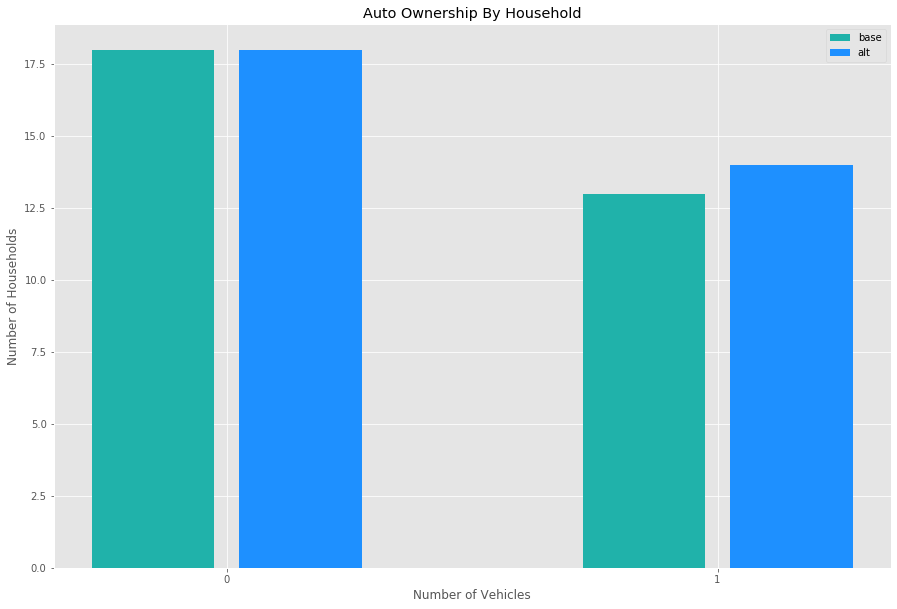

In [0]:
import matplotlib.pyplot as plt

#read and summarize data
hh_base = pd.read_csv("../example/output/final_households.csv")
hh_alt = pd.read_csv("output/final_households.csv")

autos_base = hh_base.groupby(["TAZ", "auto_ownership"]).count()["SERIALNO"]
auto_base_counts = autos_base.groupby(["auto_ownership"]).count()

autos_alt = hh_alt.groupby(["TAZ", "auto_ownership"]).count()["SERIALNO"]
auto_alt_counts = autos_alt.groupby(["auto_ownership"]).count()

#create plot
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

plt.bar(x=auto_base_counts.index - 0.15, height=auto_base_counts.values, width=0.25, label="base", color="lightseagreen")
plt.bar(x=auto_alt_counts.index + 0.15, height=auto_alt_counts.values, width=0.25, label="alt", color="dodgerblue")

plt.title('Auto Ownership By Household')
plt.ylabel('Number of Households')
plt.legend()
plt.xticks(auto_base_counts.index.values, auto_base_counts.index.values)
_ = plt.xlabel('Number of Vehicles')


# Next Steps and Further Reading

The purpose of this tutorial was to familiarize the reader with setting up an ActivitySim model and running and analyzing alternatives.  For futher information on the software, management consortium, and activity-based models in general, see the resources below. 

* ActivitySim
  * [User Documentation](https://activitysim.github.io/activitysim/)
  * [GitHub Repository](https://github.com/ActivitySim/activitysim)
  * [Project Wiki](https://github.com/ActivitySim/activitysim/wiki)
* [Activity-Based Travel Demand Models: A Primer](http://www.trb.org/Publications/Blurbs/170963.aspx)